<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/bilstm_attention_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Concatenate, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 5

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 46s 212ms/step - loss: 0.6789 - accuracy: 0.5514 - val_loss: 0.5093 - val_accuracy: 0.7861
Epoch 2/100
176/176 [==============================] - 37s 209ms/step - loss: 0.4558 - accuracy: 0.8058 - val_loss: 0.3048 - val_accuracy: 0.8721
Epoch 3/100
176/176 [==============================] - 36s 206ms/step - loss: 0.2686 - accuracy: 0.8986 - val_loss: 0.2859 - val_accuracy: 0.8805
Epoch 4/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2136 - accuracy: 0.9193 - val_loss: 0.2882 - val_accuracy: 0.8836
Epoch 5/100
176/176 [==============================] - 36s 207ms/step - loss: 0.1731 - accuracy: 0.9400 - val_loss: 0.2932 - val_accuracy: 0.8834
Epoch 6/100
176/176 [==============================] - 36s 208ms/step - loss: 0.1562 - accuracy: 0.9446 - val_loss: 0.3134 - val_accuracy: 0.8775
Epoch 7/100
176/176 [==============================] - 36s 208ms/step - loss: 0.1375 - accuracy: 0.9571 - v

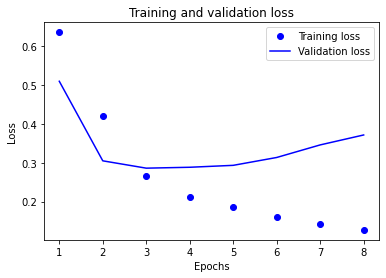

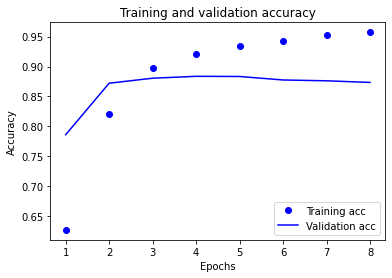

              precision    recall  f1-score   support

           0      0.864     0.903     0.883     12500
           1      0.899     0.858     0.878     12500

    accuracy                          0.880     25000
   macro avg      0.881     0.880     0.880     25000
weighted avg      0.881     0.880     0.880     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 40s 211ms/step - loss: 0.6629 - accuracy: 0.5668 - val_loss: 0.5933 - val_accuracy: 0.7046
Epoch 2/100
176/176 [==============================] - 37s 208ms/step - loss: 0.5383 - accuracy: 0.7480 - val_loss: 0.3771 - val_accuracy: 0.8357
Epoch 3/100
176/176 [==============================] - 36s 207ms/step - loss: 0.3301 - accuracy: 0.8722 - val_loss: 0.2948 - val_accuracy: 0.8788
Epoch 4/100
176/176 [==============================] - 36s 207ms/step - loss: 0.2306 - accuracy: 0.9124 - val_loss: 0.2800 - val_accuracy: 0.8815
Epoch 5/100
176/176 [==============================] - 37s 209ms/step -

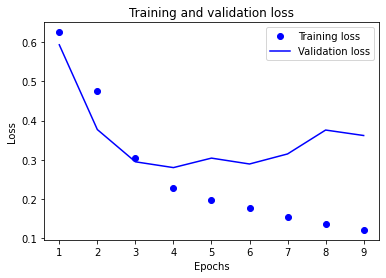

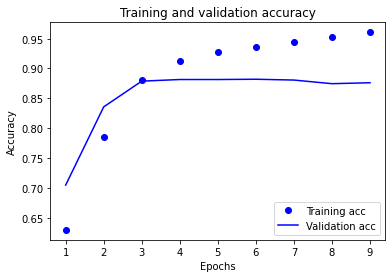

              precision    recall  f1-score   support

           0      0.876     0.888     0.882     12500
           1      0.887     0.875     0.881     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 40s 213ms/step - loss: 0.6737 - accuracy: 0.5577 - val_loss: 0.4264 - val_accuracy: 0.8128
Epoch 2/100
176/176 [==============================] - 36s 207ms/step - loss: 0.4969 - accuracy: 0.7772 - val_loss: 0.3147 - val_accuracy: 0.8651
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2674 - accuracy: 0.8983 - val_loss: 0.3304 - val_accuracy: 0.8620
Epoch 4/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2437 - accuracy: 0.9079 - val_loss: 0.3072 - val_accuracy: 0.8737
Epoch 5/100
176/176 [==============================] - 36s 208ms/step -

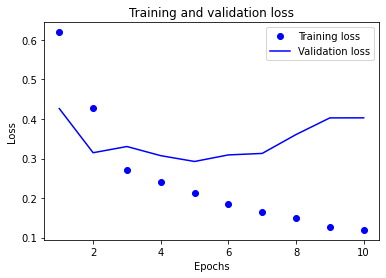

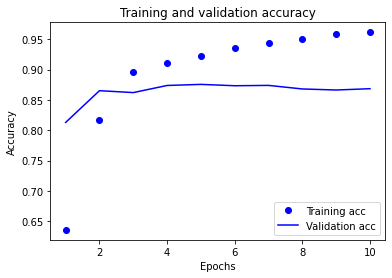

              precision    recall  f1-score   support

           0      0.890     0.857     0.873     12500
           1      0.862     0.894     0.878     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.875     25000
weighted avg      0.876     0.876     0.875     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 40s 213ms/step - loss: 0.6691 - accuracy: 0.5512 - val_loss: 0.3798 - val_accuracy: 0.8382
Epoch 2/100
176/176 [==============================] - 36s 208ms/step - loss: 0.3204 - accuracy: 0.8749 - val_loss: 0.3302 - val_accuracy: 0.8570
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2449 - accuracy: 0.9101 - val_loss: 0.3105 - val_accuracy: 0.8699
Epoch 4/100
176/176 [==============================] - 36s 207ms/step - loss: 0.1878 - accuracy: 0.9305 - val_loss: 0.3110 - val_accuracy: 0.8772
Epoch 5/100
176/176 [==============================] - 37s 209ms/step -

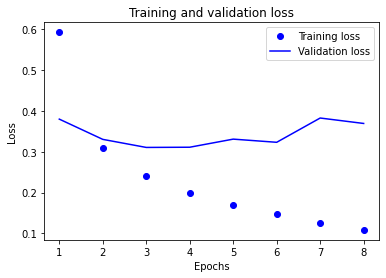

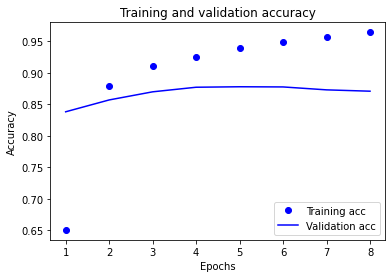

              precision    recall  f1-score   support

           0      0.838     0.917     0.876     12500
           1      0.909     0.822     0.863     12500

    accuracy                          0.870     25000
   macro avg      0.873     0.870     0.870     25000
weighted avg      0.873     0.870     0.870     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 40s 215ms/step - loss: 0.6631 - accuracy: 0.5719 - val_loss: 0.5575 - val_accuracy: 0.7955
Epoch 2/100
176/176 [==============================] - 37s 208ms/step - loss: 0.3969 - accuracy: 0.8236 - val_loss: 0.3207 - val_accuracy: 0.8630
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2593 - accuracy: 0.9032 - val_loss: 0.2899 - val_accuracy: 0.8800
Epoch 4/100
176/176 [==============================] - 37s 209ms/step - loss: 0.2143 - accuracy: 0.9232 - val_loss: 0.3238 - val_accuracy: 0.8764
Epoch 5/100
176/176 [==============================] - 37s 209ms/step -

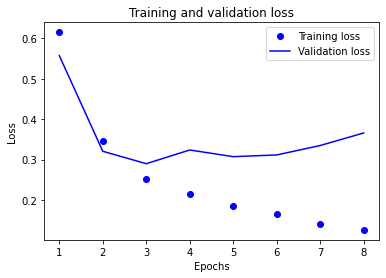

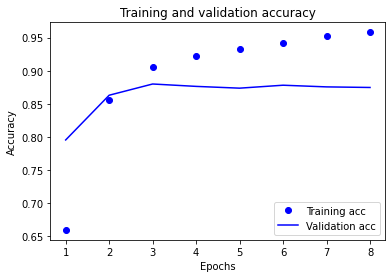

              precision    recall  f1-score   support

           0      0.907     0.846     0.876     12500
           1      0.856     0.914     0.884     12500

    accuracy                          0.880     25000
   macro avg      0.882     0.880     0.880     25000
weighted avg      0.882     0.880     0.880     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 40s 212ms/step - loss: 0.6741 - accuracy: 0.5534 - val_loss: 0.5559 - val_accuracy: 0.7608
Epoch 2/100
176/176 [==============================] - 37s 209ms/step - loss: 0.4021 - accuracy: 0.8259 - val_loss: 0.3052 - val_accuracy: 0.8727
Epoch 3/100
176/176 [==============================] - 36s 208ms/step - loss: 0.2499 - accuracy: 0.9053 - val_loss: 0.2944 - val_accuracy: 0.8769
Epoch 4/100
176/176 [==============================] - 36s 207ms/step - loss: 0.2035 - accuracy: 0.9286 - val_loss: 0.3360 - val_accuracy: 0.8678
Epoch 5/100
176/176 [==============================] - 37s 208ms/step -

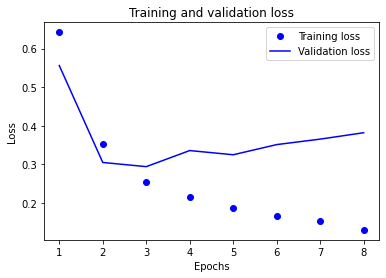

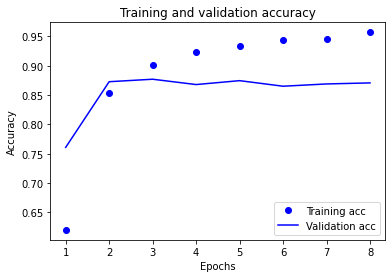

              precision    recall  f1-score   support

           0      0.873     0.882     0.878     12500
           1      0.881     0.872     0.876     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 40s 212ms/step - loss: 0.6696 - accuracy: 0.5637 - val_loss: 0.3955 - val_accuracy: 0.8369
Epoch 2/100
176/176 [==============================] - 37s 208ms/step - loss: 0.3307 - accuracy: 0.8705 - val_loss: 0.2876 - val_accuracy: 0.8789
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2366 - accuracy: 0.9144 - val_loss: 0.3211 - val_accuracy: 0.8788
Epoch 4/100
176/176 [==============================] - 37s 210ms/step - loss: 0.1895 - accuracy: 0.9335 - val_loss: 0.3612 - val_accuracy: 0.8709
Epoch 5/100
176/176 [==============================] - 37s 208ms/step -

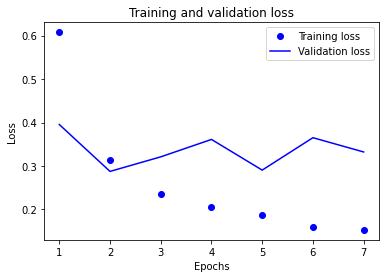

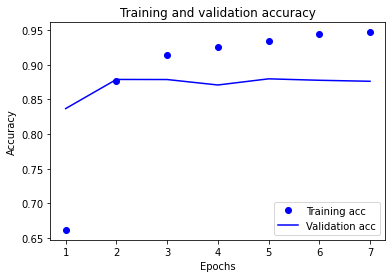

              precision    recall  f1-score   support

           0      0.913     0.838     0.874     12500
           1      0.850     0.920     0.884     12500

    accuracy                          0.879     25000
   macro avg      0.881     0.879     0.879     25000
weighted avg      0.881     0.879     0.879     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 40s 212ms/step - loss: 0.6799 - accuracy: 0.5424 - val_loss: 0.6058 - val_accuracy: 0.7751
Epoch 2/100
176/176 [==============================] - 37s 210ms/step - loss: 0.4396 - accuracy: 0.8166 - val_loss: 0.3128 - val_accuracy: 0.8699
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2592 - accuracy: 0.9018 - val_loss: 0.2907 - val_accuracy: 0.8778
Epoch 4/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2131 - accuracy: 0.9234 - val_loss: 0.3021 - val_accuracy: 0.8769
Epoch 5/100
176/176 [==============================] - 37s 208ms/step -

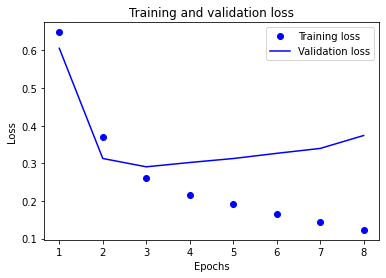

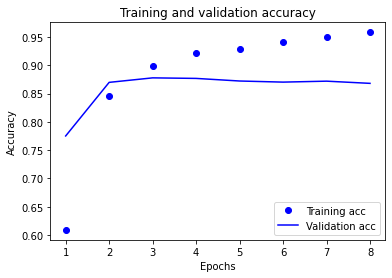

              precision    recall  f1-score   support

           0      0.883     0.871     0.877     12500
           1      0.873     0.885     0.879     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 40s 212ms/step - loss: 0.6728 - accuracy: 0.5555 - val_loss: 0.4810 - val_accuracy: 0.7644
Epoch 2/100
176/176 [==============================] - 37s 209ms/step - loss: 0.4167 - accuracy: 0.8173 - val_loss: 0.2982 - val_accuracy: 0.8750
Epoch 3/100
176/176 [==============================] - 37s 209ms/step - loss: 0.2574 - accuracy: 0.9057 - val_loss: 0.2847 - val_accuracy: 0.8800
Epoch 4/100
176/176 [==============================] - 37s 210ms/step - loss: 0.2264 - accuracy: 0.9202 - val_loss: 0.2929 - val_accuracy: 0.8808
Epoch 5/100
176/176 [==============================] - 37s 210ms/step -

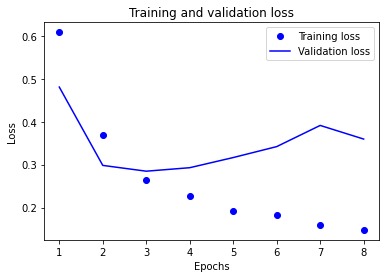

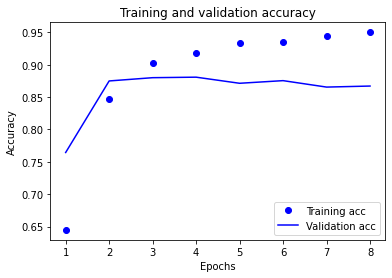

              precision    recall  f1-score   support

           0      0.896     0.860     0.878     12500
           1      0.866     0.900     0.882     12500

    accuracy                          0.880     25000
   macro avg      0.881     0.880     0.880     25000
weighted avg      0.881     0.880     0.880     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 40s 213ms/step - loss: 0.6532 - accuracy: 0.5842 - val_loss: 0.3217 - val_accuracy: 0.8609
Epoch 2/100
176/176 [==============================] - 37s 210ms/step - loss: 0.2918 - accuracy: 0.8849 - val_loss: 0.2916 - val_accuracy: 0.8767
Epoch 3/100
176/176 [==============================] - 37s 208ms/step - loss: 0.2269 - accuracy: 0.9165 - val_loss: 0.2934 - val_accuracy: 0.8740
Epoch 4/100
176/176 [==============================] - 37s 209ms/step - loss: 0.1975 - accuracy: 0.9317 - val_loss: 0.2999 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 37s 208ms/step 

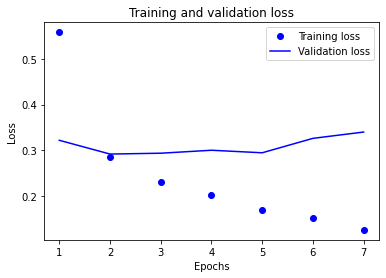

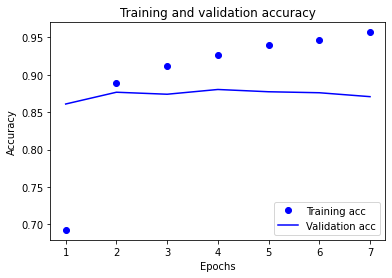

              precision    recall  f1-score   support

           0      0.866     0.891     0.878     12500
           1      0.888     0.862     0.875     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


Average accuracy: 0.8808 (+/- 0.0046)
Average loss: 0.2855 (+/- 0.0076)
Average F1: 0.8779 (+/- 0.0056)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):
  
  print("KFold: {} starts.".format(n))
  inputs = Input(shape=(None,), dtype="int32")
  embeddings = Embedding(input_dim=input_dim, output_dim=output_dim)(inputs)
  bilstm = Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True))(embeddings)
  attention_layer = Attention()([bilstm, bilstm])
  pooling_out1 = GlobalMaxPooling1D()(bilstm)
  pooling_out2 = GlobalMaxPooling1D()(attention_layer)
  merge = Concatenate()([pooling_out1, pooling_out2])
  mlp_hidden_out = Dense(units=64, activation="relu")(merge)
  mlp_hidden_out = Dropout(rate=0.5)(mlp_hidden_out)
  outputs = Dense(units=1, activation="sigmoid")(mlp_hidden_out)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
